# Preliminaries

In [1]:
import tensorflow as tf
import numpy as np

# Neural Network Architecture

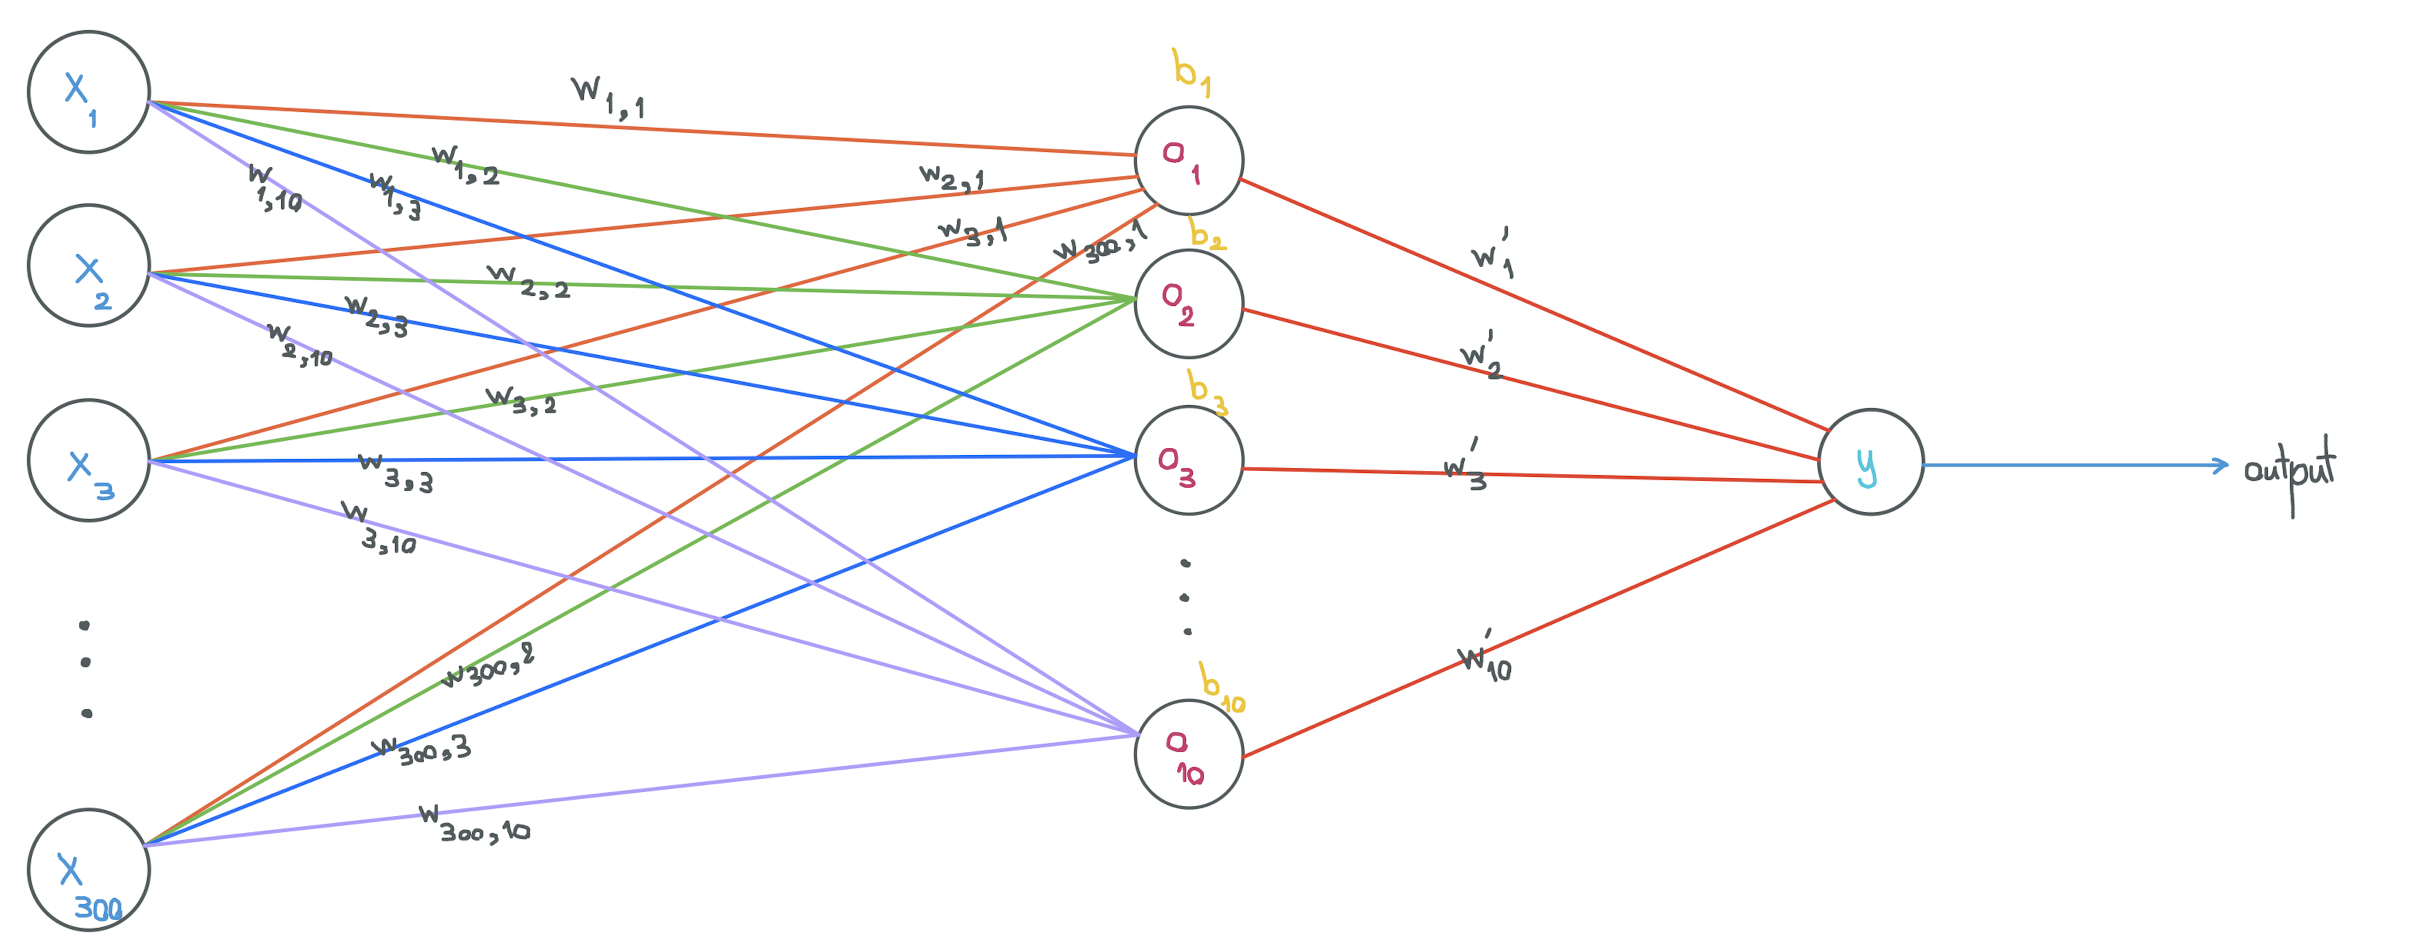

$\mathrm{ReLU}(x) = \max(0,x) \quad\quad\hspace{100px}
\mathrm{Sigmoid}(x) = \dfrac{1}{1+e^{-x}}$</br></br>
$o_j = \mathrm{ReLU}(\sum_{1\le i \le 300, 1\le j \le 10} (w_{i,j}x_i+b_j) )\quad j=1,2,\dots,10$</br></br>
$y=\mathrm{Sigmoid}((\sum_{1 \le i \le 10}w'_i o_i)+b')$

## Using the functional API

In [2]:
class my_neural_net(tf.keras.Model):
    def __init__(self):
        super(my_neural_net, self).__init__() # first of all, call the init method of the class it extends from
        self.dense1 = tf.keras.layers.Dense(10, activation='relu')
        self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')
    def call(self, x: tf.Tensor) -> tf.Tensor:
        output = self.dense1(x)
        output = self.dense2(output)
        return output

## Using the Sequential API

In [12]:
class my_neural_net(tf.keras.Model):
    def __init__(self):
        super(my_neural_net, self).__init__() # first of all, call the init method of the class it extends from
        self.all_in_one = tf.keras.Sequential([
                                               tf.keras.layers.Dense(10, activation='relu'),
                                               tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    def call(self, x: tf.Tensor) -> tf.Tensor:
        output = self.all_in_one(x)
        return output

In [13]:
model = my_neural_net()

In [14]:
model.build((1,300)) # add the weights as Tensorflow Variables

In [15]:
model.summary()

Model: "my_neural_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (1, 1)                    3021      
                                                                 
Total params: 3,021
Trainable params: 3,021
Non-trainable params: 0
_________________________________________________________________


# Testing the Model

## Feeding an input and getting the corresponding output

In [16]:
model(np.random.rand(2, 300))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.8613887 ],
       [0.89054406]], dtype=float32)>

In [17]:
model.predict(np.random.rand(2, 300))

array([[0.9241626],
       [0.8425789]], dtype=float32)

## Working with the inner layers

In [18]:
model.layers

In [19]:
model.layers[0](np.random.rand(2, 300))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.91178775],
       [0.8692025 ]], dtype=float32)>

In [ ]:
model.layers[1](model.layers[0](np.random.rand(2, 300)))

In [21]:
model.layers[0]